In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [1]:
# 한글폰트
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [2]:
import pandas as pd

data = pd.read_csv('train.csv')
data.rename({'전화해지여부':'target'}, axis=1, inplace=True)
data

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,target
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [3]:
data['target'].value_counts()

0    26882
1     3318
Name: target, dtype: int64

In [8]:
data.iloc[:,1:-1].columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수',
       '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수'],
      dtype='object')

## 1. 종속변수와 관계보기

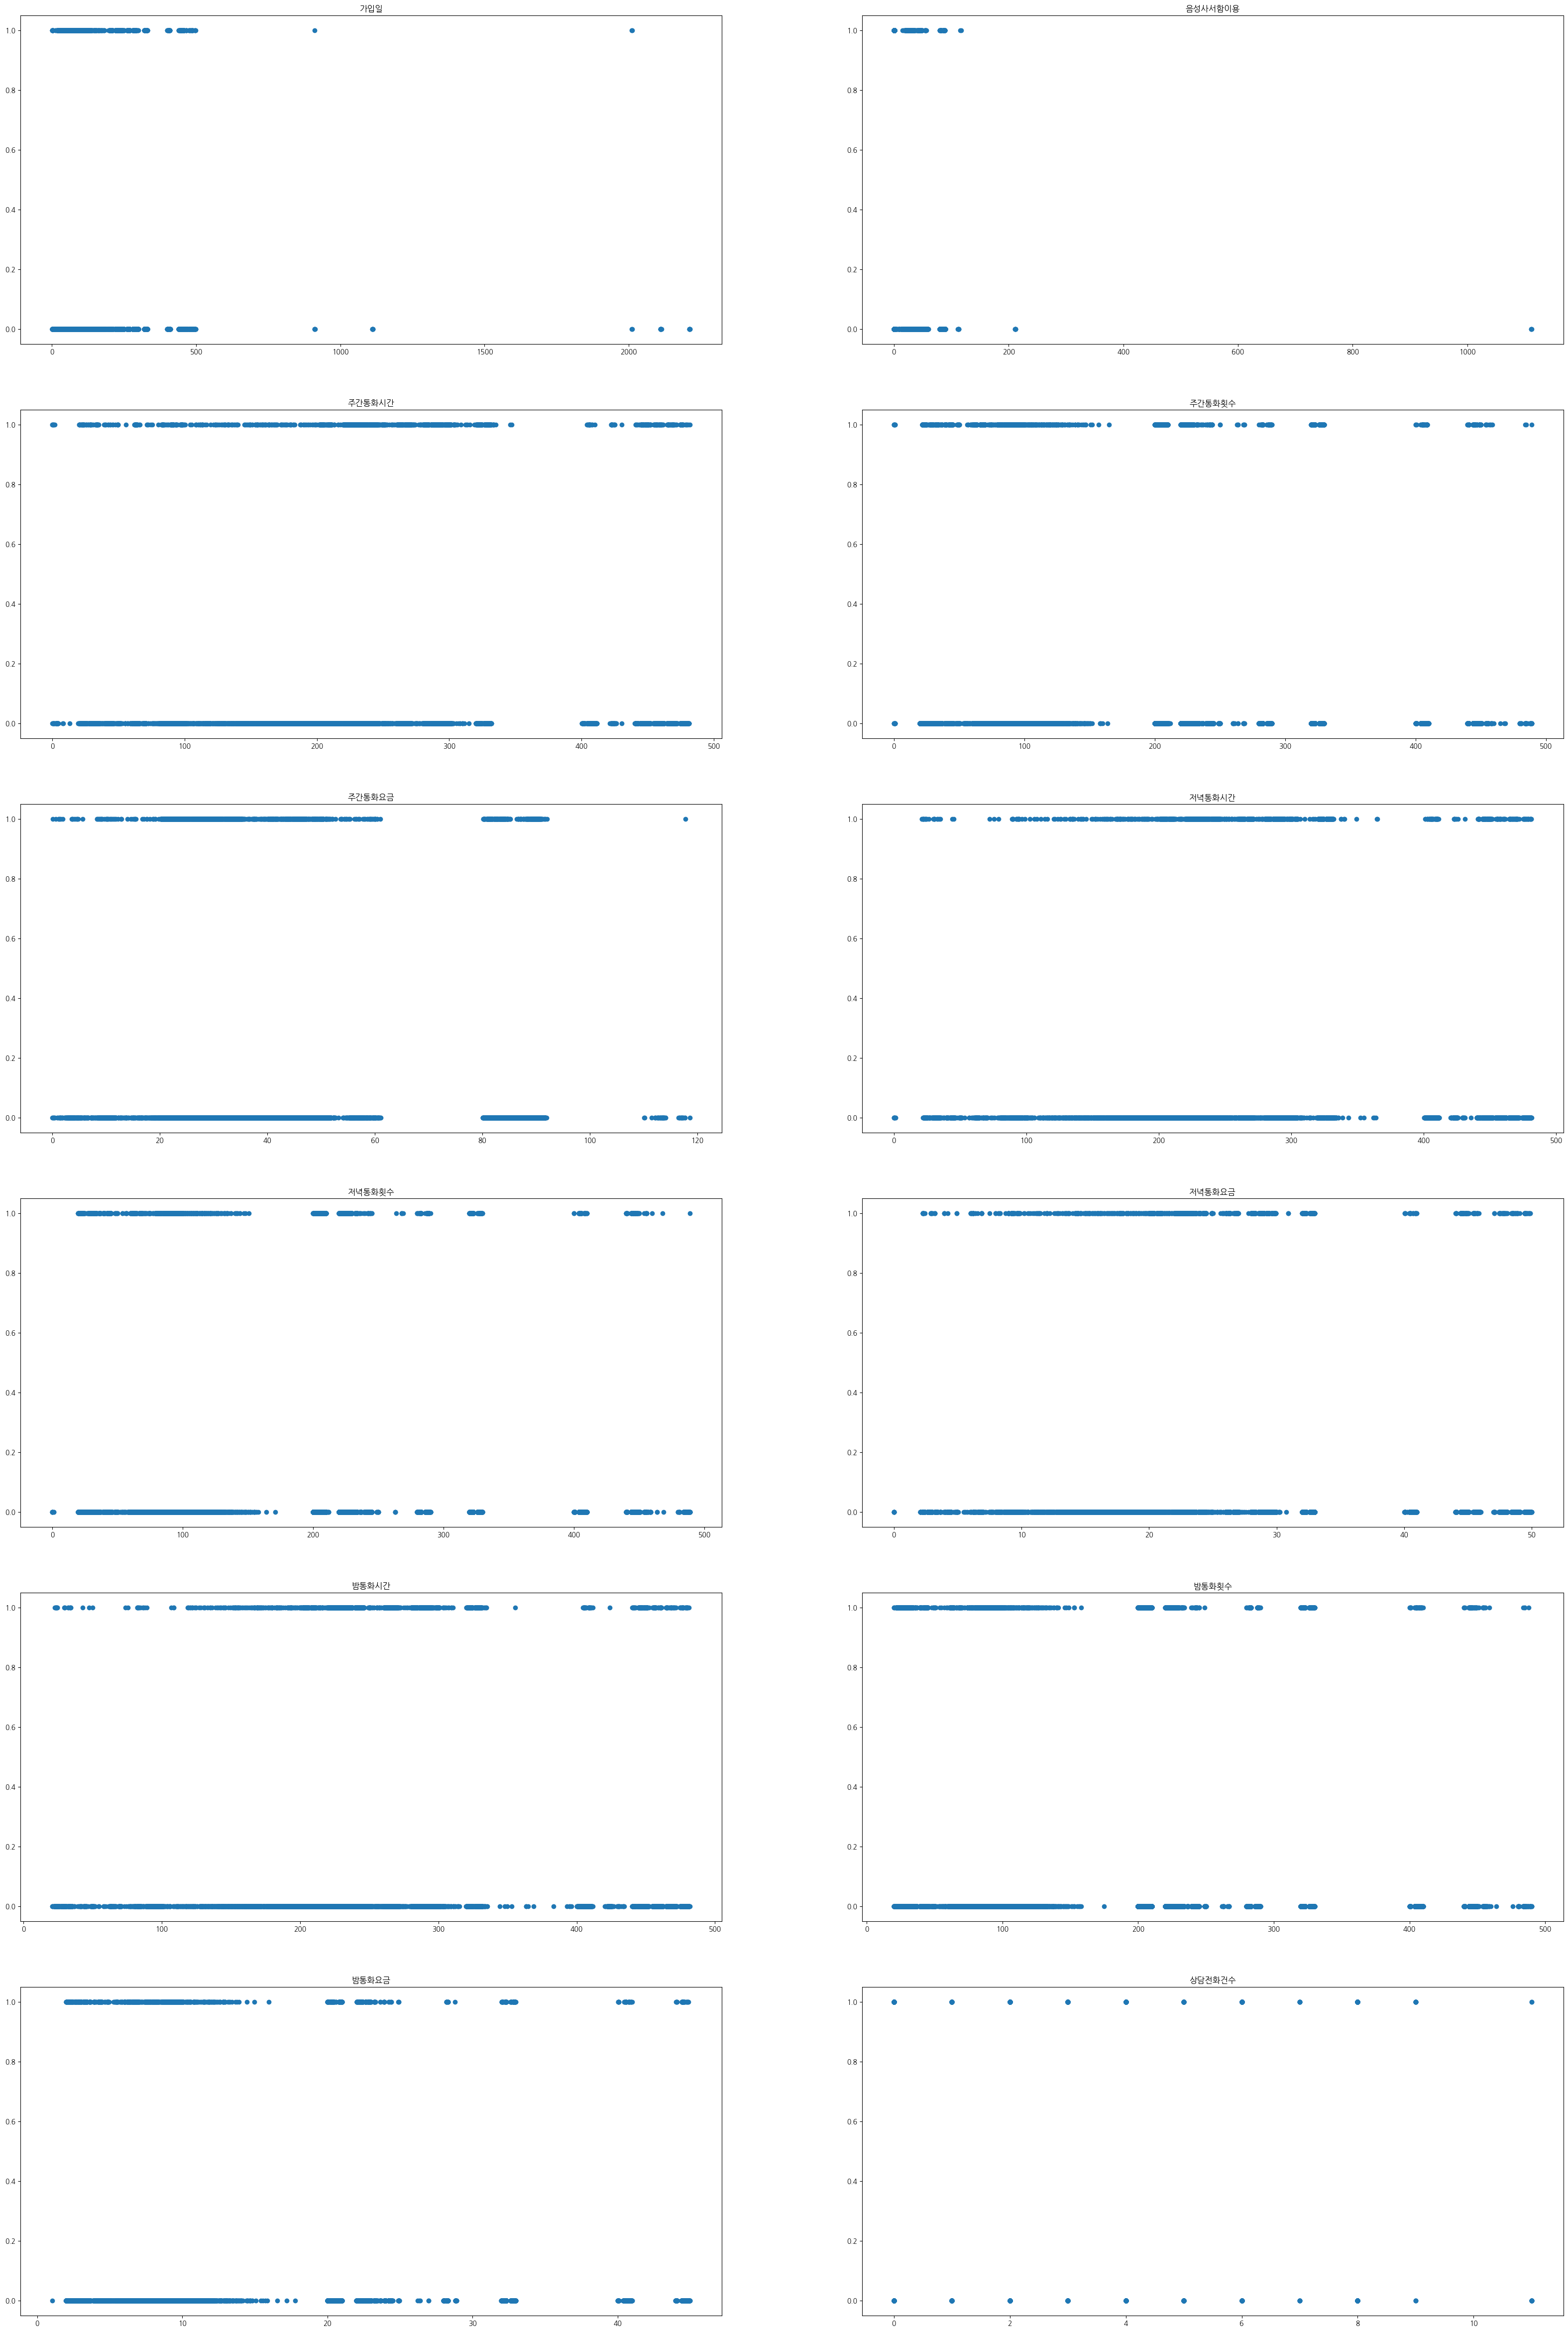

In [22]:
# 1. 전체 변수이용
import matplotlib.pyplot as plt

# 3x4 subplot 그리기
fig, axs = plt.subplots(6, 2, figsize=(40, 60))
i, j = 0, 0
for column in data.iloc[:,1:-1].columns:
    axs[i,j].set_title(f'{column}')
    axs[i,j].scatter(data[column], data.iloc[:,-1])
    j += 1
    if j == 2:
        j = 0
        i += 1
    

plt.show()

In [33]:
# 2. 중간값로 나눠서 살펴보기
data_bi = data.copy()

# 0과 1로 변환하는 함수 정의
def binarize(x):
    if x < median:
        return 0
    else:
        return 1

for column in data.iloc[:,1:-1].columns:
    # 중간값 계산
    median = data[column].median()
    # apply 함수를 이용하여 중간값을 기준으로 0과 1로 변환
    data_bi[column] = data[column].apply(binarize)
data_bi

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,target
0,TRAIN_00000,1,0,0,0,0,1,0,1,1,1,1,1,0
1,TRAIN_00001,0,1,1,1,1,1,1,1,1,1,1,1,0
2,TRAIN_00002,0,1,1,1,1,0,1,1,1,1,0,0,0
3,TRAIN_00003,1,1,0,1,0,0,0,1,0,1,1,0,0
4,TRAIN_00004,1,0,0,1,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,1,1,1,1,0,1,1,1,0,0,1,1,0
30196,TRAIN_30196,1,1,0,1,1,1,1,1,1,1,0,1,0
30197,TRAIN_30197,0,0,0,0,0,0,0,0,1,0,0,1,0
30198,TRAIN_30198,0,1,1,1,0,1,1,1,1,1,1,1,1


가입일
음성사서함이용
주간통화시간
주간통화횟수
주간통화요금
저녁통화시간
저녁통화횟수
저녁통화요금
밤통화시간
밤통화횟수
밤통화요금
상담전화건수


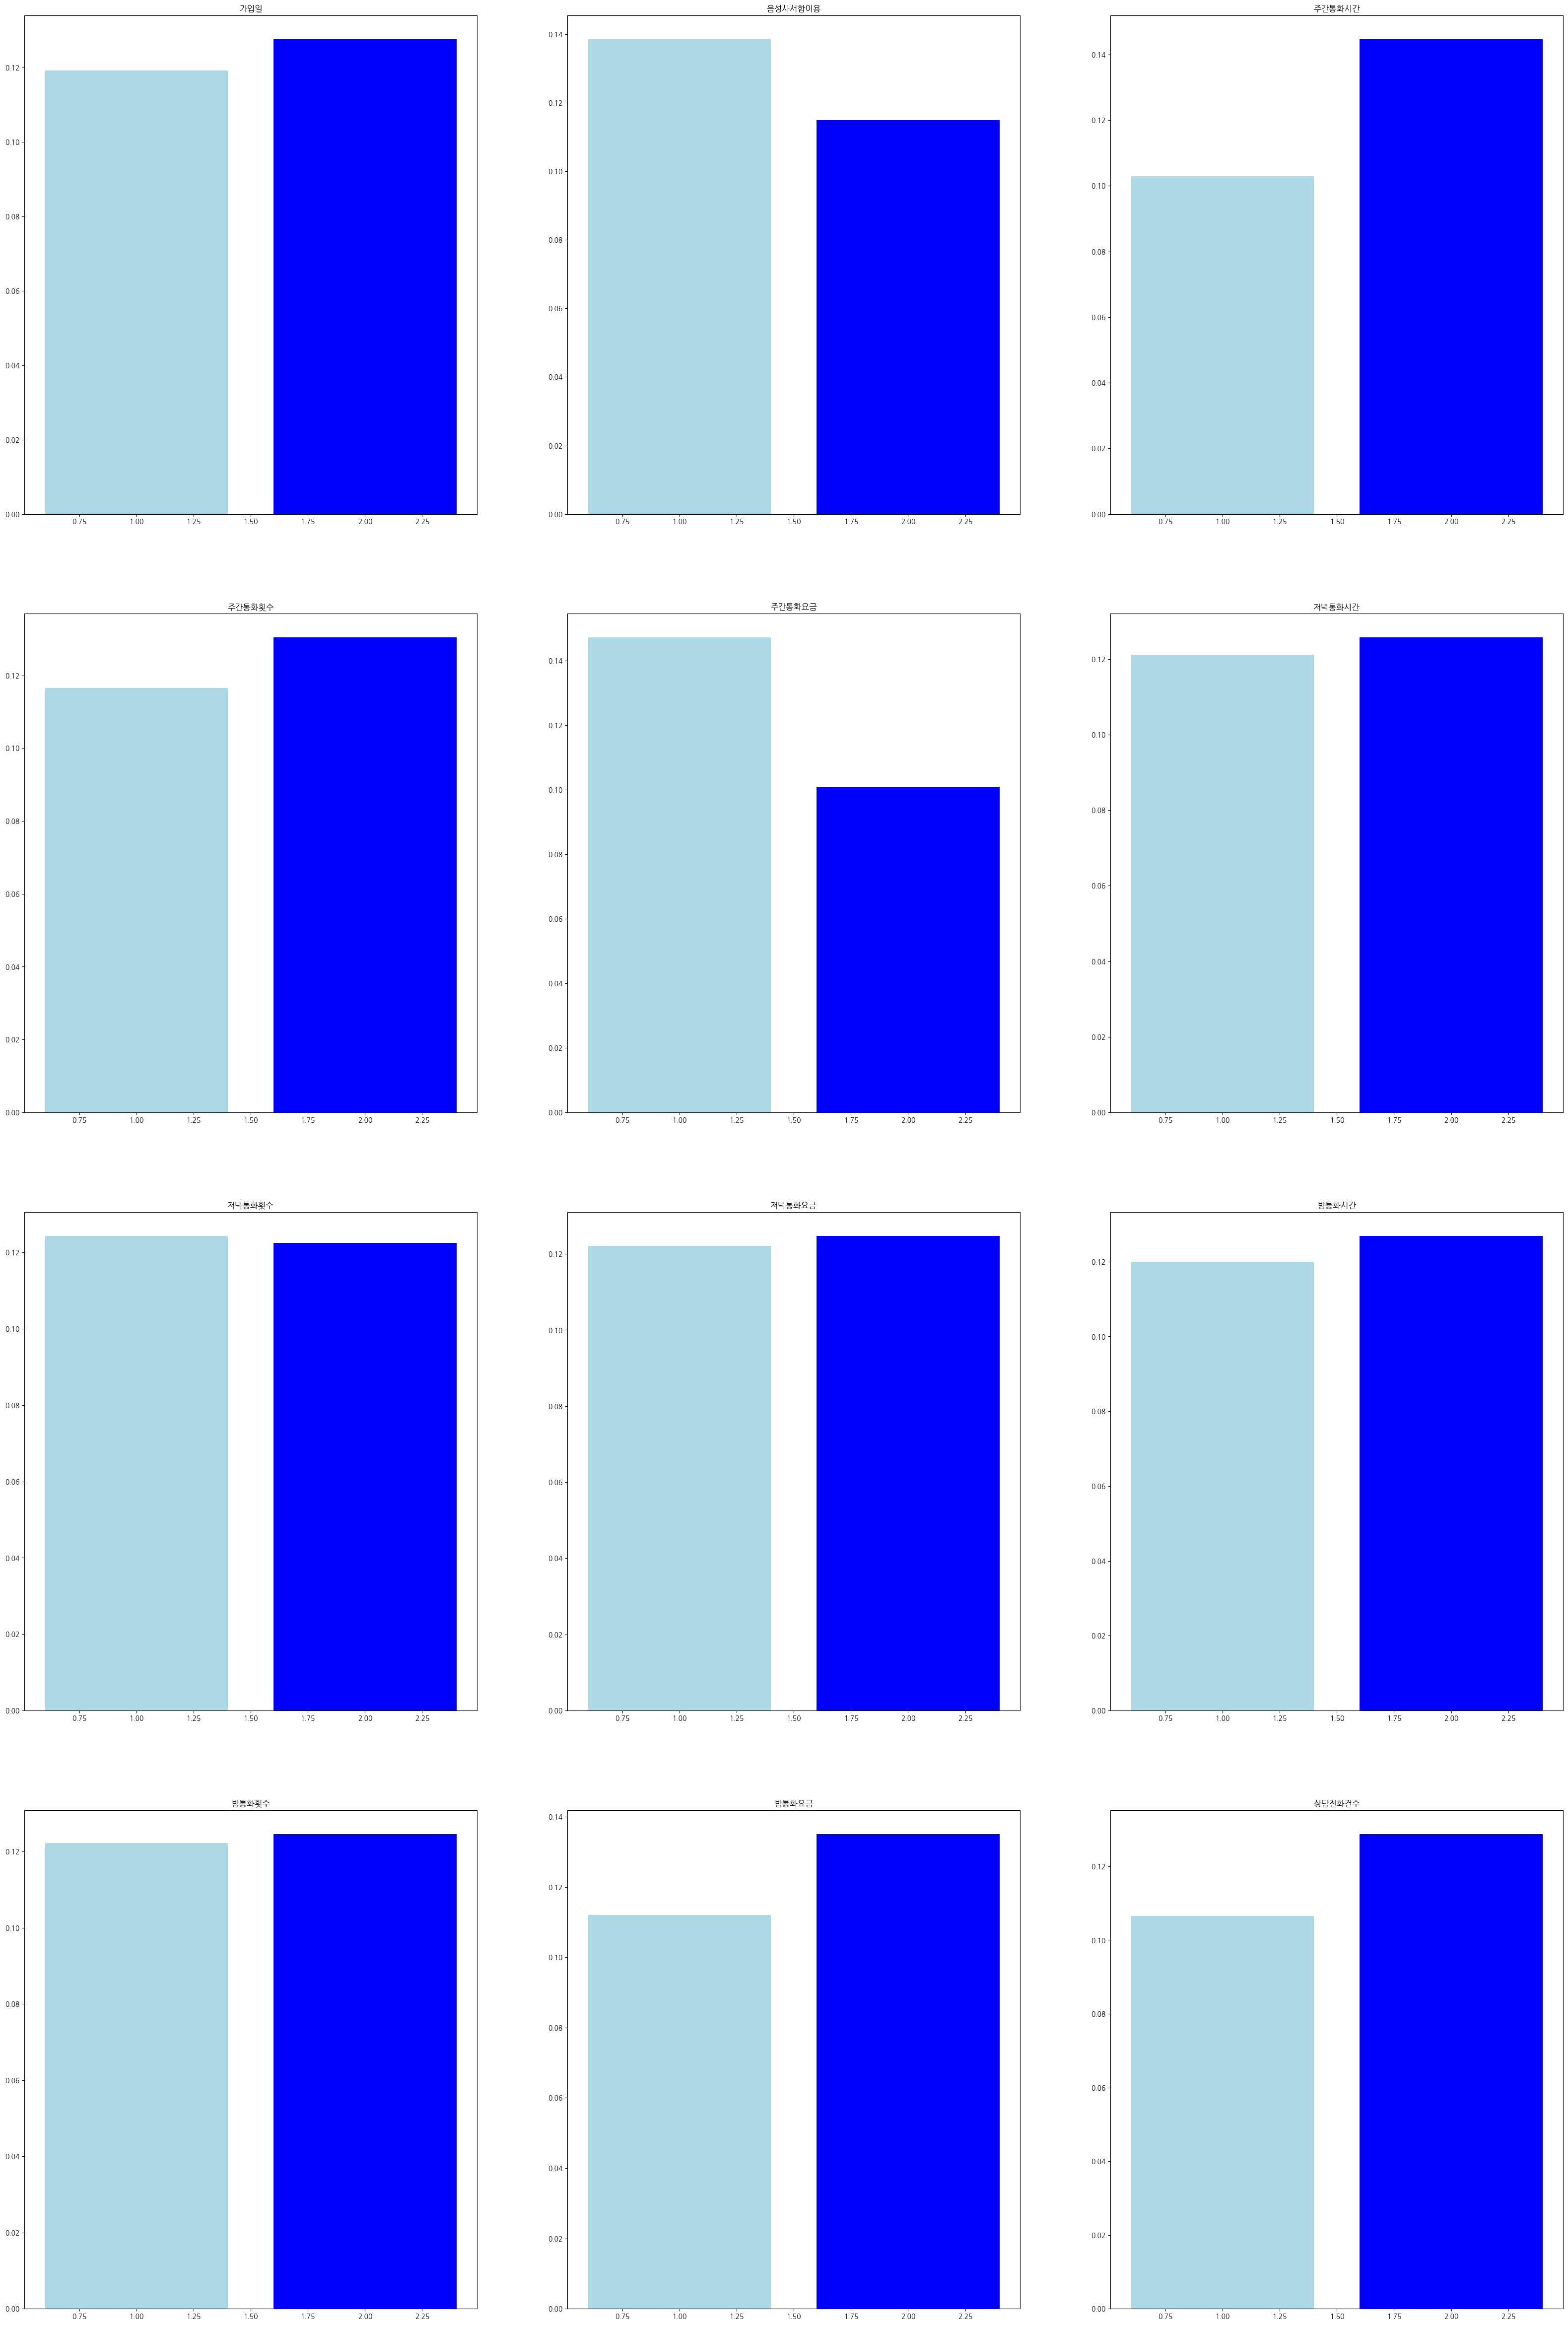

In [72]:
# 1. 전체 변수이용
import matplotlib.pyplot as plt

# 3x4 subplot 그리기
fig, axs = plt.subplots(4, 3, figsize=(40, 60))
i, j = 0, 0
for column in data.iloc[:,1:-1].columns:
    print(column)
    # 계약해지/계약유지 비율
    axs[i,j].set_title(f'{column}')
    axs[i,j].bar([1], data[data_bi[column]==0]['target'].value_counts()[1]/data[data_bi[column]==0]['target'].value_counts()[0], color='lightblue')
    axs[i,j].bar([2], data[data_bi[column]==1]['target'].value_counts()[1]/data[data_bi[column]==1]['target'].value_counts()[0], color='blue')

    
    j += 1
    if j == 3:
        j = 0
        i += 1
    

plt.show()

In [60]:
data['음성사서함이용'].quantile(.25)

0.0

In [61]:
# 2. 사분위수로 나눠서 살펴보기
data_q = data.copy()

data['가입일'].quantile(.25)

def qrize(x):
    if x <= q1:
        return 0
    elif x <= q2:
        return 1
    elif x <= q3:
        return 2
    else:
        return 3


for column in data.iloc[:,1:-1].columns:
    q1 = data[column].quantile(.25)
    q2 = data[column].quantile(.5)
    q3 = data[column].quantile(.75)
    data_q[column] = data[column].apply(qrize)
data_q

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,target
0,TRAIN_00000,3,0,0,1,1,2,0,3,2,3,3,0,0
1,TRAIN_00001,0,3,3,3,3,2,3,3,3,2,3,0,0
2,TRAIN_00002,1,3,2,3,2,0,3,3,2,3,1,0,0
3,TRAIN_00003,2,1,0,2,1,1,0,2,0,3,2,0,0
4,TRAIN_00004,2,0,0,2,1,1,0,2,2,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,3,3,2,2,0,2,3,3,0,0,2,0,0
30196,TRAIN_30196,3,3,0,3,3,2,2,3,2,2,1,0,0
30197,TRAIN_30197,0,0,0,0,0,1,0,0,3,1,0,0,0
30198,TRAIN_30198,0,1,2,2,1,2,3,3,2,2,3,0,1


가입일
음성사서함이용
주간통화시간
주간통화횟수
주간통화요금
저녁통화시간
저녁통화횟수
저녁통화요금
밤통화시간
밤통화횟수
밤통화요금
상담전화건수


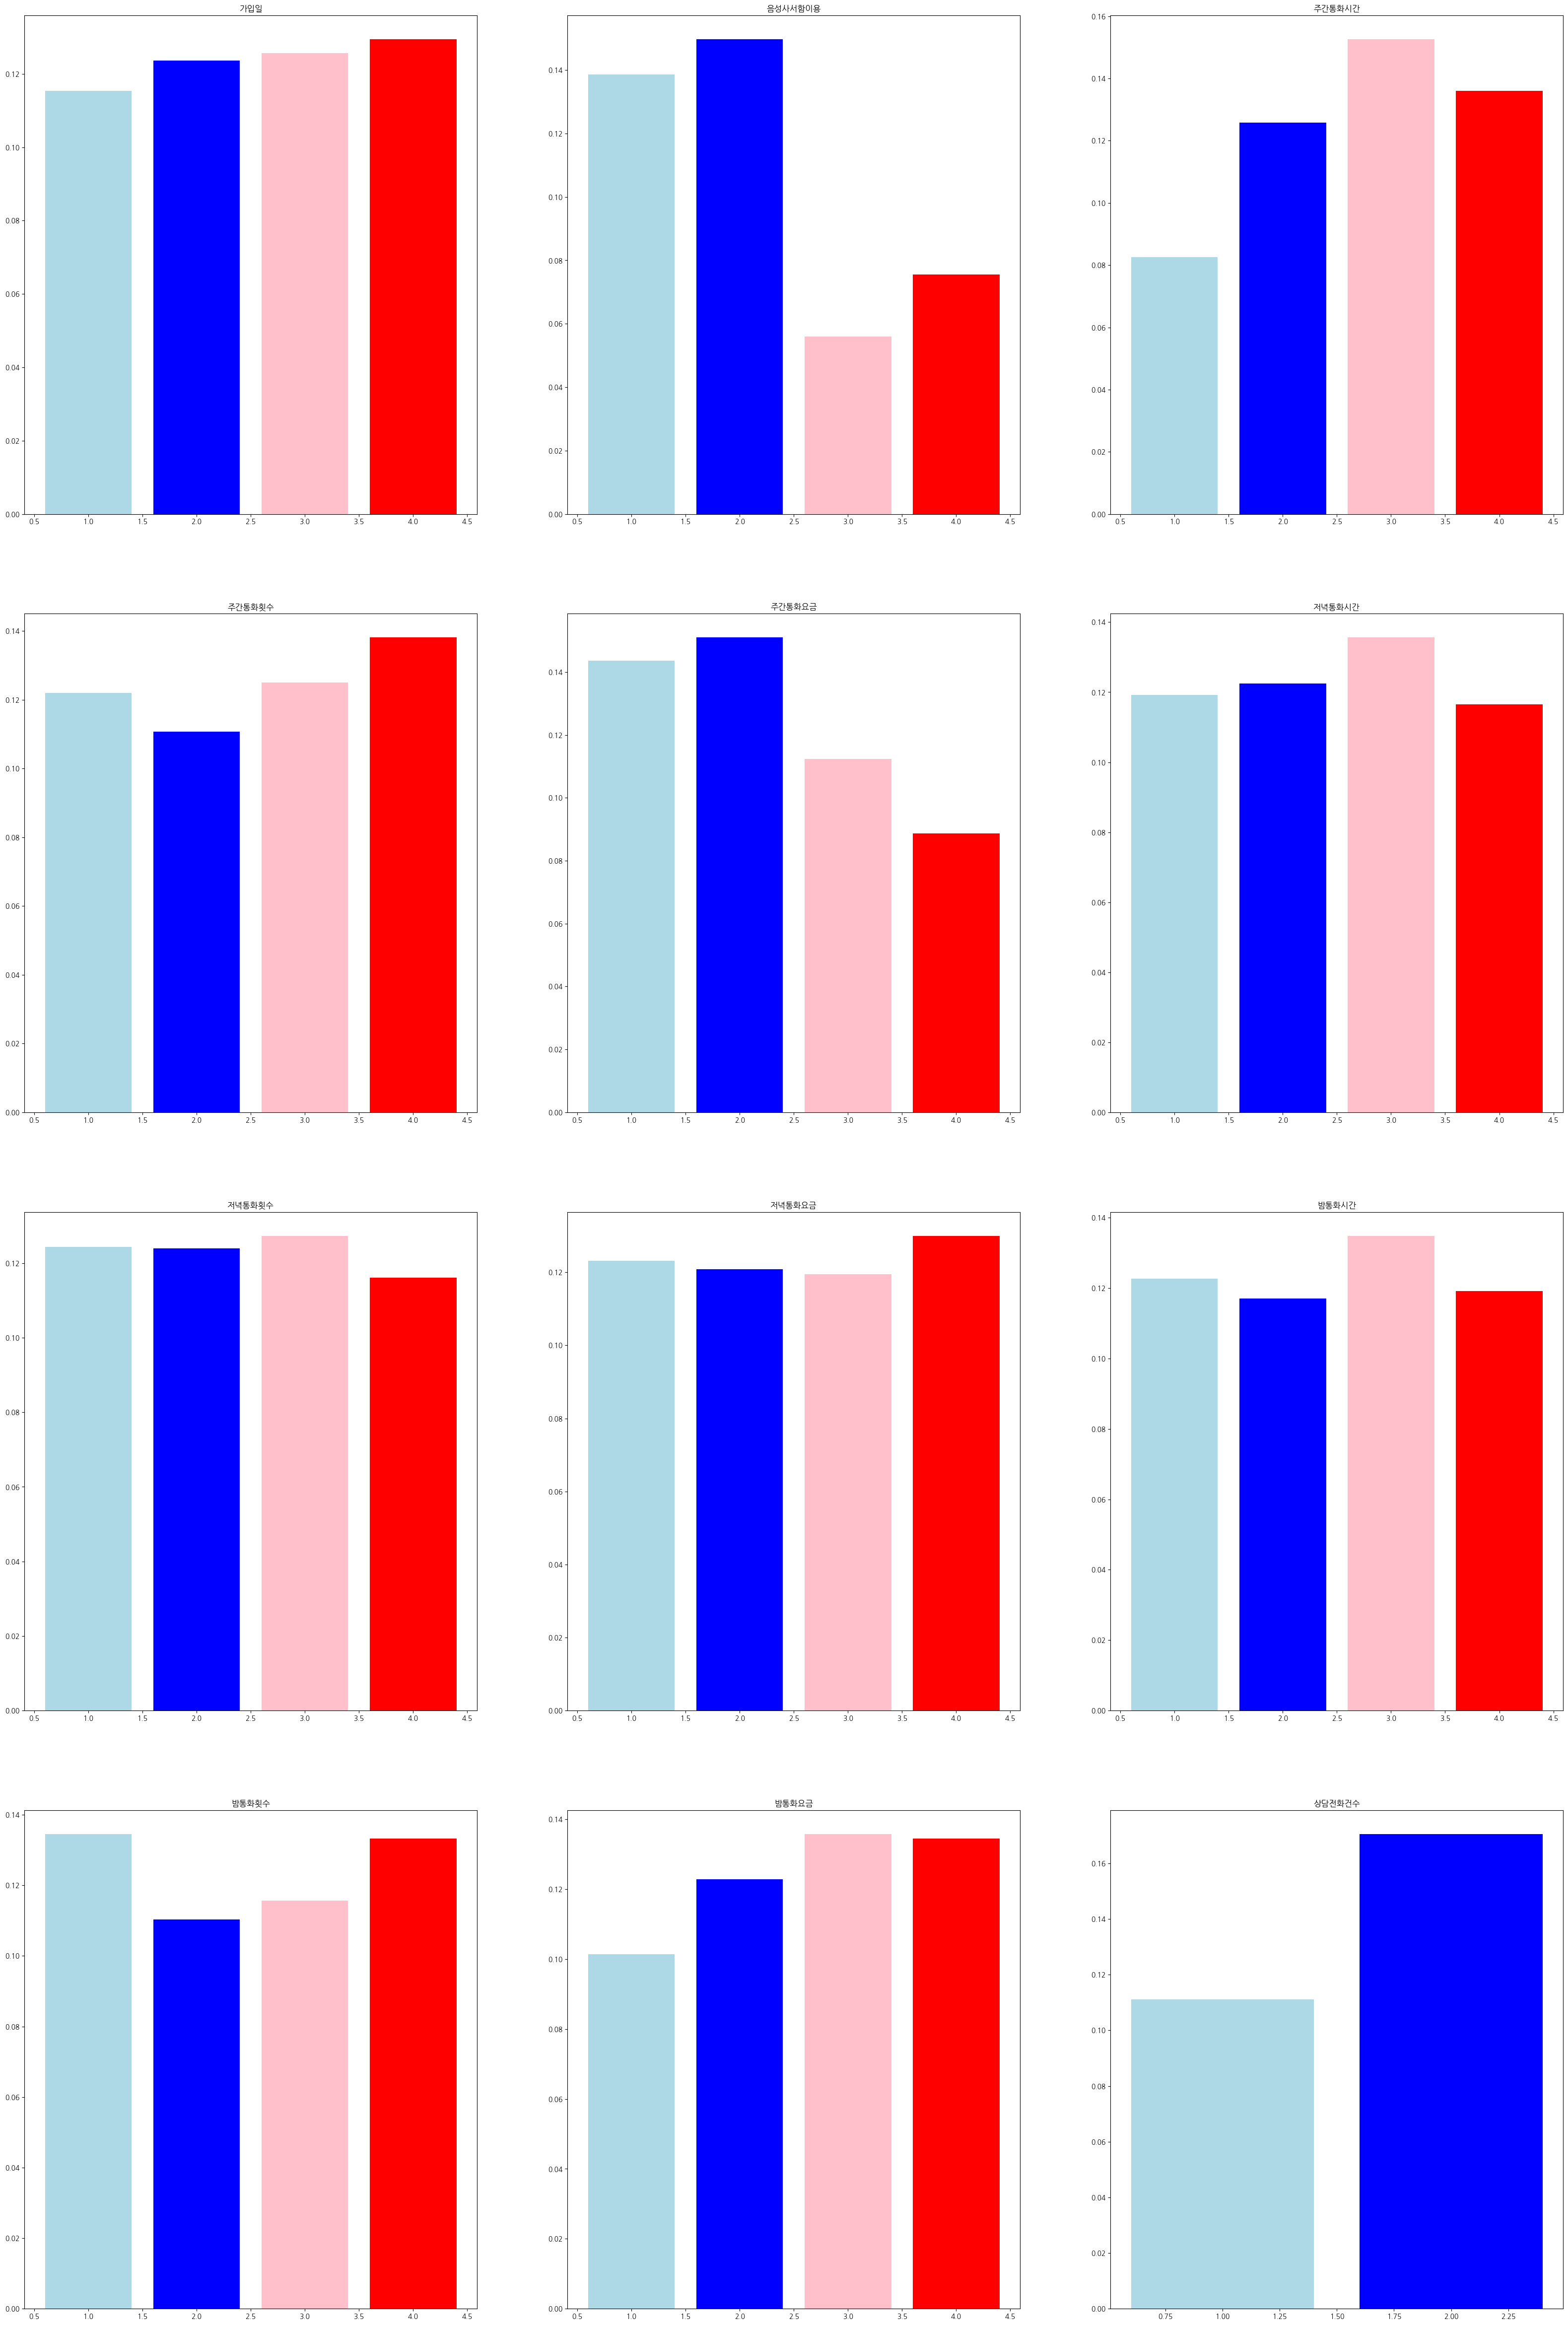

In [70]:
# 1. 전체 변수이용
import matplotlib.pyplot as plt

# 3x4 subplot 그리기
fig, axs = plt.subplots(4, 3, figsize=(40, 60))
i, j = 0, 0
for column in data.iloc[:,1:-1].columns:
    print(column)
    
    # 계약해지/계약유지 비율
    if column !='상담전화건수':
        
        axs[i,j].set_title(f'{column}')
        axs[i,j].bar([1], data[data_q[column]==0]['target'].value_counts()[1]/data[data_q[column]==0]['target'].value_counts()[0], color='lightblue')
        axs[i,j].bar([2], data[data_q[column]==1]['target'].value_counts()[1]/data[data_q[column]==1]['target'].value_counts()[0], color='blue')
        axs[i,j].bar([3], data[data_q[column]==2]['target'].value_counts()[1]/data[data_q[column]==2]['target'].value_counts()[0], color='pink')
        axs[i,j].bar([4], data[data_q[column]==3]['target'].value_counts()[1]/data[data_q[column]==3]['target'].value_counts()[0], color='red')
    
    else:
        axs[i,j].set_title(f'{column}')
        axs[i,j].bar([1], data[data_q[column]==0]['target'].value_counts()[1]/data[data_q[column]==0]['target'].value_counts()[0], color='lightblue')
        axs[i,j].bar([2], data[data_q[column]==3]['target'].value_counts()[1]/data[data_q[column]==3]['target'].value_counts()[0], color='blue')
      
    
    j += 1
    if j == 3:
        j = 0
        i += 1
    

plt.show()

## 2. pycaret

In [3]:


# 라이브러리를 불러옵니다.
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 독립 변수와 종속 변수를 분리합니다.
X = data.drop(['ID','target'], axis=1)
y = data['target']

# 데이터를 학습 데이터와 테스트 데이터로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 객체를 생성합니다.
smote = SMOTE(random_state=42)

# 학습 데이터에 SMOTE를 적용하여 오버샘플링합니다.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train, )

# 이제 X_train_resampled, y_train_resampled를 사용하여 모델을 학습시킬 수 있습니다.
data_resampled =  X_train_resampled.copy()
data_resampled['target'] = y_train_resampled
data_resampled.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,target
0,224,1,245.9,42,49.9,243.8,23,24.94,223.5,93,4.40,0,1
1,263,1,333.3,63,36.7,323.9,93,22.02,262.2,223,2.23,2,1
2,35,1,233.3,39,23.3,224.4,244,20.44,204.0,93,9.09,0,0
3,76,1,154.5,79,27.9,212.2,100,17.92,155.0,100,6.91,1,0
4,222,25,405.0,225,43.0,222.9,224,22.03,243.9,204,3.44,2,0


In [26]:
test = X_test.copy()
test['target'] = y_test
data_resampled.shape

(42934, 13)

In [5]:
# 라이브러리를 불러옵니다.
from pycaret.classification import *

# 데이터 프레임(df)을 사용하여 환경을 설정합니다.
# 종속 변수(dependent variable)가 'target'이라고 가정합니다.
exp = setup(data=data_resampled, target='target', session_id=123)

# 기본 모델을 비교하여 가장 성능이 좋은 모델을 선택합니다.
# result = compare_models()

# 이 코드의 실행 결과로 가장 성능이 좋은 모델이 표시됩니다.

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(42934, 13)"
4,Transformed data shape,"(42934, 13)"
5,Transformed train set shape,"(30053, 13)"
6,Transformed test set shape,"(12881, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [6]:
from pycaret.classification import *
# 모델가져오기
et = create_model('et')
rf = create_model('rf')
dt = create_model('dt')
lightgbm = create_model('lightgbm')
knn = create_model('knn')
gbc = create_model('gbc')

# 'lightgbm' 모델의 하이퍼파라미터를 최적화합니다.
# tuned_et = tune_model(et)
# tuned_rf = tune_model(rf)
# tuned_dt = tune_model(dt)
# tuned_lightgbm = tune_model(lightgbm)
# tuned_knn = tune_model(knn)
# tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9621,0.9850,0.9681,0.9566,0.9623,0.9242,0.9242
1,0.9621,0.9871,0.9721,0.9530,0.9625,0.9242,0.9243
2,0.9637,0.9882,0.9681,0.9598,0.9639,0.9275,0.9275
3,0.9644,0.9881,0.9721,0.9574,0.9647,0.9288,0.9289
4,0.9611,0.9880,0.9687,0.9541,0.9614,0.9221,0.9222
5,0.9700,0.9891,0.9754,0.9651,0.9702,0.9401,0.9402
6,0.9634,0.9856,0.9727,0.9549,0.9637,0.9268,0.9269
7,0.9627,0.9855,0.9634,0.9621,0.9627,0.9255,0.9255
8,0.9651,0.9888,0.9720,0.9586,0.9653,0.9301,0.9302


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9431,0.9846,0.9368,0.9488,0.9428,0.8862,0.8863
1,0.9508,0.9875,0.9554,0.9466,0.9510,0.9015,0.9016
2,0.9558,0.9881,0.9568,0.9548,0.9558,0.9115,0.9115
3,0.9554,0.9881,0.9587,0.9524,0.9556,0.9108,0.9108
4,0.9454,0.9861,0.9454,0.9454,0.9454,0.8908,0.8908
5,0.9544,0.9870,0.9461,0.9621,0.9540,0.9088,0.9089
6,0.9448,0.9843,0.9494,0.9407,0.9450,0.8895,0.8896
7,0.9474,0.9852,0.9441,0.9504,0.9472,0.8948,0.8949
8,0.9531,0.9885,0.9461,0.9595,0.9527,0.9062,0.9062


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8743,0.8743,0.8896,0.8631,0.8761,0.7485,0.7489
1,0.8653,0.8653,0.8849,0.8515,0.8679,0.7305,0.7311
2,0.8693,0.8693,0.8929,0.8526,0.8723,0.7385,0.7393
3,0.8582,0.8582,0.8676,0.8517,0.8596,0.7165,0.7166
4,0.8629,0.8629,0.8816,0.8499,0.8654,0.7258,0.7263
5,0.8649,0.8649,0.8822,0.8527,0.8672,0.7298,0.7302
6,0.8696,0.8695,0.8889,0.8559,0.8721,0.7391,0.7396
7,0.8559,0.8559,0.8788,0.8402,0.8591,0.7118,0.7126
8,0.8589,0.8589,0.8795,0.8446,0.8617,0.7178,0.7184


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8699,0.9501,0.8656,0.8732,0.8694,0.7399,0.7399
1,0.8743,0.9494,0.8709,0.8768,0.8738,0.7485,0.7485
2,0.8832,0.9551,0.8816,0.8845,0.8830,0.7665,0.7665
3,0.8799,0.9538,0.8782,0.8812,0.8797,0.7597,0.7597
4,0.8789,0.9517,0.8809,0.8774,0.8792,0.7577,0.7577
5,0.8832,0.9529,0.8749,0.8897,0.8823,0.7664,0.7665
6,0.8676,0.9463,0.8689,0.8666,0.8678,0.7351,0.7351
7,0.8849,0.9534,0.8728,0.8943,0.8834,0.7697,0.7699
8,0.8752,0.9514,0.8688,0.8800,0.8744,0.7504,0.7505


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8609,0.9419,0.9874,0.7881,0.8766,0.7219,0.7461
1,0.8580,0.9443,0.9880,0.7841,0.8743,0.7159,0.7414
2,0.8619,0.9459,0.9914,0.7875,0.8778,0.7239,0.7494
3,0.8622,0.9442,0.9800,0.7932,0.8768,0.7244,0.7454
4,0.8589,0.9470,0.9840,0.7871,0.8746,0.7178,0.7414
5,0.8752,0.9479,0.9914,0.8045,0.8882,0.7504,0.7715
6,0.8542,0.9481,0.9920,0.7778,0.8719,0.7085,0.7370
7,0.8636,0.9438,0.9867,0.7917,0.8785,0.7271,0.7502
8,0.8612,0.9489,0.9887,0.7878,0.8769,0.7225,0.7472


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7715,0.8602,0.7512,0.7829,0.7667,0.5429,0.5434
1,0.7731,0.8622,0.7385,0.7934,0.7650,0.5462,0.5476
2,0.7818,0.8664,0.7804,0.7825,0.7815,0.5635,0.5635
3,0.7820,0.8667,0.7698,0.7892,0.7794,0.5641,0.5642
4,0.7740,0.8621,0.7605,0.7818,0.7710,0.5481,0.5483
5,0.7700,0.8541,0.7538,0.7792,0.7663,0.5401,0.5404
6,0.7724,0.8553,0.7532,0.7834,0.7680,0.5448,0.5452
7,0.7790,0.8615,0.7617,0.7890,0.7751,0.5581,0.5584
8,0.7707,0.8607,0.7570,0.7782,0.7675,0.5414,0.5416


In [8]:
# 테스트 데이터 이용한 에측
prediction_et = predict_model(et)
prediction_rf = predict_model(rf)
prediction_dt = predict_model(dt)
prediction_lightgbm = predict_model(lightgbm)
prediction_knn = predict_model(knn)
prediction_gbc = predict_model(gbc)


# 모델 최종 학습
final_et = finalize_model(et)
final_rf = finalize_model(rf)
final_dt = finalize_model(dt)
final_lightgbm = finalize_model(lightgbm)
final_knn = finalize_model(knn)
final_gbc = finalize_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9682,0.9879,0.9750,0.9619,0.9684,0.9363,0.9364


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9514,0.9879,0.9506,0.9521,0.9514,0.9028,0.9028


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8693,0.8693,0.8868,0.8569,0.8716,0.7387,0.7391


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8799,0.9521,0.8747,0.8839,0.8793,0.7598,0.7598


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8686,0.9491,0.9884,0.7973,0.8826,0.7371,0.7592


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7690,0.8563,0.7509,0.7791,0.7648,0.5381,0.5384


In [22]:
plot_model(et, plot='learning')


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000027D43DBEE50> (for post_execute):


KeyboardInterrupt: 

In [30]:
predict_model(et, data = test)
predict_model(rf, data = test)
predict_model(dt, data = test)
predict_model(lightgbm, data = test)
predict_model(knn, data = test)
predict_model(gbc, data = test)

predict_model(final_et, data = test)
predict_model(final_rf, data = test)
predict_model(final_dt, data = test)
predict_model(final_lightgbm, data = test)
predict_model(final_knn, data = test)
predict_model(final_gbc, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9232,0.8959,0.5824,0.6420,0.6107,0.5682,0.5691


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9043,0.8866,0.5088,0.5399,0.5239,0.4707,0.4710


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8081,0.6694,0.4944,0.2682,0.3478,0.2467,0.2626


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8354,0.7978,0.4576,0.3039,0.3653,0.2751,0.2827


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7561,0.8179,0.7760,0.2668,0.3971,0.2873,0.3518


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7548,0.6868,0.4128,0.1880,0.2584,0.1355,0.1505


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9285,0.9095,0.5824,0.6804,0.6276,0.5883,0.5905


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9134,0.9053,0.5232,0.5924,0.5556,0.5079,0.5091


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8407,0.6996,0.5216,0.3296,0.4040,0.3174,0.3286


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8406,0.8028,0.4400,0.3097,0.3635,0.2755,0.2811


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8058,0.8395,0.7760,0.3195,0.4526,0.3586,0.4109


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7528,0.6875,0.4176,0.1878,0.2591,0.1357,0.1513


,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,target,prediction_label,prediction_score
3068,282,1,328.200012,281,31.600000,284.500000,88,32.320000,323.000000,62,20.080000,8,0,0,0.5024
30027,63,1,223.899994,223,24.100000,293.299988,203,26.389999,264.399994,32,2.330000,3,0,1,0.5671
9375,329,0,93.199997,89,30.200001,323.700012,93,28.200001,291.500000,33,2.290000,8,0,0,0.5349
28791,209,1,281.100006,207,29.299999,299.500000,329,32.919998,282.000000,68,32.279999,8,0,1,0.5017
23913,45,1,445.399994,408,49.700001,450.500000,440,48.599998,442.299988,407,40.840000,4,0,0,0.8413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25739,322,0,329.799988,98,84.099998,331.299988,280,32.320000,202.699997,282,9.320000,2,0,0,0.7523
1611,222,22,241.800003,45,42.099998,222.500000,92,29.040001,205.600006,204,9.230000,0,0,0,0.5904
8293,34,29,296.100006,225,45.299999,223.199997,94,22.490000,203.199997,44,9.240000,2,0,1,0.5256
22492,323,88,68.500000,98,34.200001,210.100006,70,32.279999,293.200012,32,8.880000,2,0,0,0.6713


## 3. 제출하기

In [32]:
test = pd.read_csv('test.csv')
test_result = predict_model(final_et, data = test.iloc[:,1:])
test_result

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,prediction_label,prediction_score
0,110,0,210.699997,142,35.599998,205.899994,93,17.430000,120.900002,111,5.37,2,0,0.81
1,283,1,268.500000,100,30.299999,283.000000,92,28.320000,290.000000,89,8.82,0,0,0.95
2,34,1,243.300003,205,21.299999,225.699997,205,29.000000,92.599998,29,2.44,2,0,0.96
3,209,86,83.000000,93,24.100000,270.600006,220,22.889999,266.899994,81,2.80,6,0,0.89
4,202,0,293.200012,23,31.000000,294.000000,24,26.389999,223.800003,33,6.66,2,1,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,322,1,282.399994,202,89.900002,270.200012,321,32.799999,293.600006,321,8.88,2,0,0.96
12939,222,0,233.500000,209,34.599998,234.000000,92,23.219999,224.399994,202,9.63,2,0,0.94
12940,98,29,223.399994,209,29.299999,223.899994,203,28.820000,230.000000,208,22.26,2,0,0.97
12941,23,30,241.300003,222,24.700001,234.300003,93,22.230000,223.100006,33,9.93,0,0,0.91


In [35]:
submission = test[['ID']]
submission['전화해지여부'] = test_result[['prediction_label']]
submission.to_csv('submission1.csv',header=True, index=False)